# Import required libraries

Keep all the import library code on a single cell to keep the notebook's organization, additional dowloads and setups keep them on this section.

[margin_code]: <> (#<-----20--char-----><-----20--char-----><-----20--char-----><-doc-lim-><-code|>)

In [1]:
# Standard library imports
import datetime
import os
import pickle
import time # Show the execution time on specific sections

# Third-party imports
#import keras
import matplotlib.patches as mptc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn.ensemble as skl_esm
import sklearn.svm as svm
import sklearn.metrics as skl_mtc
import sklearn.model_selection as skl_mod_sel
import sklearn.preprocessing as skl_pre
import xgboost as xgb

# Propietary imports
import utilities as utl

%matplotlib inline

# 1. The data

## 1.1. Exploration
Previsualize the first rows in the dataframe. The data is located on the followinf [Kaggle page](https://www.kaggle.com/prathamtripathi/regression-with-neural-networking/download).

In [2]:
concrete_df = pd.read_csv(f'{os.getcwd()}/input/concrete_data.csv')
concrete_df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

Check the dataset to identify possible missing values and the data type on each column.

In [3]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


The pandas method called **info** showed all the attributes have a quantitative data type. There are no missing values, however, be careful to invalid numeric values (like negative numbers or high values, sometimes those numeric representations mean the real value is missing).

The pandas method called **describe** helps to identify the mentioned cases, it does not need any additional parameter because there are no categorical columns.

In [4]:
concrete_df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

There are no negative values or high values like 9999 so all the data is valid.

## 1.2. Visualization

Plot histograms, boxplots, and any additional graph that help to identify possible patterns, outliers and understand the information better.

In [5]:
def scatter_plot():
    # Only to show the execution time per code block
    start_time = time.time()

    axs = pd.plotting.scatter_matrix(concrete_df, figsize=(15, 10))

    for ax in axs[:,0]: # the left boundary
        ax.tick_params(axis='x', colors='gray')
        ax.tick_params(axis='y', colors='gray')
        ax.xaxis.label.set_color('gray')
        ax.yaxis.label.set_color('gray')

    for ax in axs[-1,:]: # the lower boundary
        ax.tick_params(axis='x', colors='gray')
        ax.tick_params(axis='y', colors='gray')
        ax.xaxis.label.set_color('gray')
        ax.yaxis.label.set_color('gray')

    plt.show();

    # Only to show the execution time per code block
    print(f'{time.time() - start_time:.2f} seconds on executing this code block.')

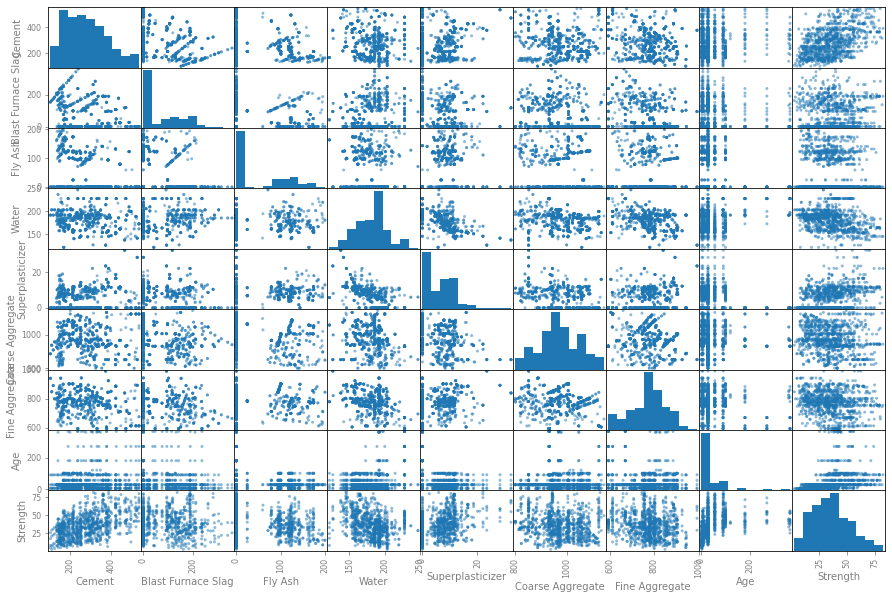

7.93 seconds on executing this code block.


In [6]:
scatter_plot()

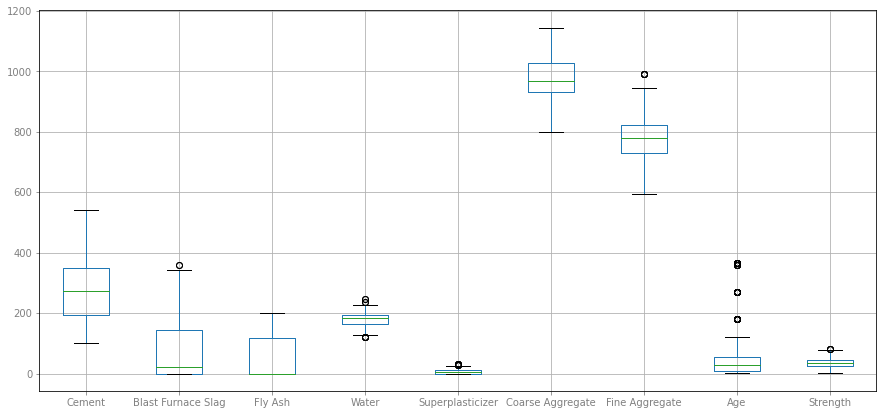

In [8]:
ax = concrete_df.plot.box(figsize=(15, 7), grid=True);
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

The boxplot helps to identify the outliers; all the values are in a similar range, only the attribute **Age** has several outliers, so one possible preprocessing method could eliminate the outliers on the training set or apply a preprocessing transformation to reduce their outlier effects.

The attributes called **Blast Furnace Slag**, **Fly Ash**, **Superplasticizer** and **Age** seems to be highly skewed, so check the available data description before doing any preprocessing data decisions (A *Concrete_Readme.txt* was found in [UCI.edu](https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/), it has a similar dataset so that Readme was used alongside the Kaggle dataset description to full fill the attributes information.

The mentioned Readme has the next dataset description and copyright notes: 

>Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
>
>
>NOTE: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:
>
>I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial 
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)

* [0] **Cement**: Quantitative attribute, it represents the kilograms of cement used in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.


* [1] **Blast Furnace Slag**: Quantitative attribute, it represents the blast furnace slag in kilograms in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.


* [2] **Fly Ash**: Quantitative attribute, it represents the fly ash in kilograms in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.


* [3] **Water**: Quantitative attribute, it represents the water in kilograms in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.


* [4] **Superplasticizer**: Quantitative attribute, it represents the superplasticizer in kilograms in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.

* [5] **Coarse Aggregate**: Quantitative attribute, it represents the coarse aggregate (particles above 4.75mm) in kilograms in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.


* [6] **Fine Aggregate**: Quantitative attribute, it represents the fine aggregate (sand in kilograms in one cubic meter of mixture (*kg/m<sup>3</sup>*). **No missing values**.


* [7] **Age**: Quantitative attribute, it represents the age or time in days until the concrete needs repairing  (1-365). **No missing values**.


* [8] **Strength**: Quantitative attribute, it represents the concrete strength (MPa). **No missing values**.

Using the information above including the graphics, the attributes **Blast Furnace Slag**, **Fly Ash**, **Superplasticizer** and **Age** could be preprocessed to reduce the skewed data, use the following histograms to check that possible step.

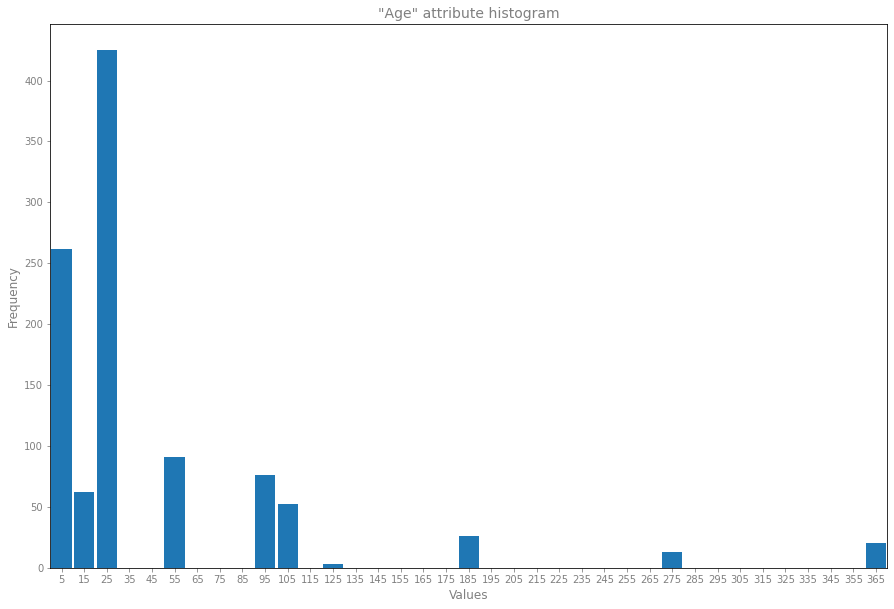

In [9]:
utl.plot_histogram(concrete_df, 'Age', bins=range(0, 380, 10))

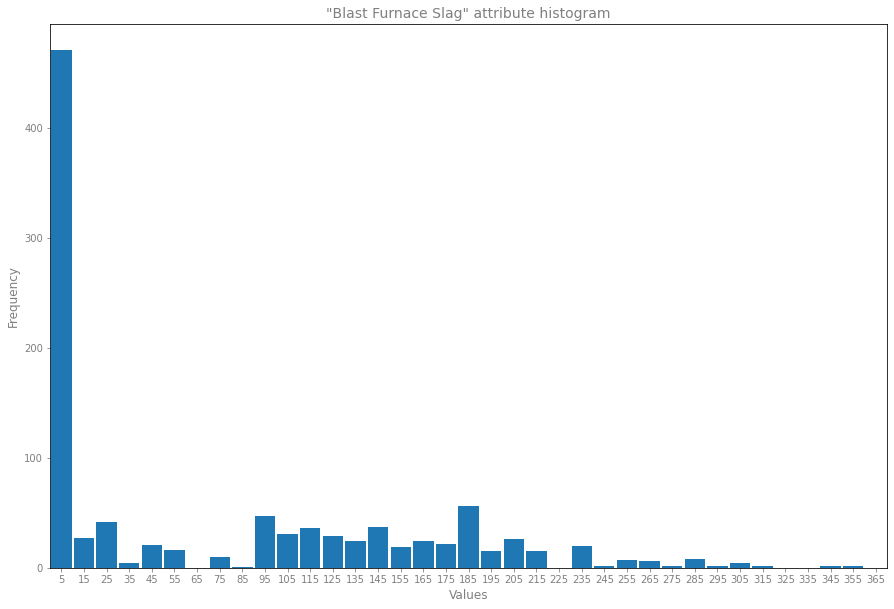

In [10]:
utl.plot_histogram(concrete_df, 'Blast Furnace Slag', bins=range(0, 380, 10))

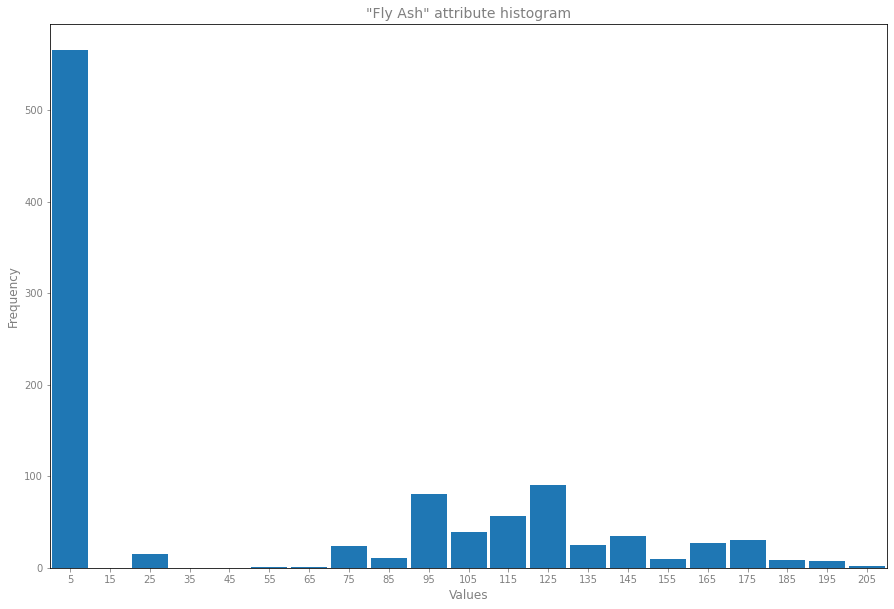

In [11]:
utl.plot_histogram(concrete_df, 'Fly Ash', bins=range(0, 220, 10))

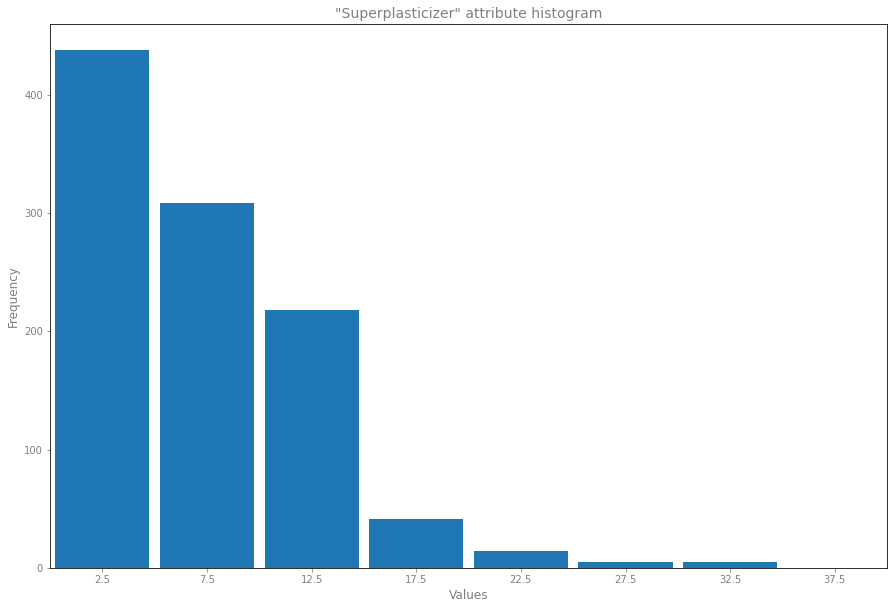

In [12]:
utl.plot_histogram(concrete_df, 'Superplasticizer', bins=range(0, 45, 5))

## 1.3. Split the dataset

It is essential to separate the dataset in *training* (80%), *validation* (10%), and *testing* (10%) sets before continuing to next steps. The purpose is to keep the testing and validation sets unseen even in the preprocessing process. It helps to generalize and get realistic results.

In [13]:
concrete_df, input_validation = skl_mod_sel.train_test_split(
    concrete_df.copy(),
    test_size=0.2,
    random_state=42
)

input_validation, input_test = skl_mod_sel.train_test_split(
    input_validation.copy(),
    test_size=0.5,
    random_state=42
)

## 1.4. Attribute combinations

It is useful to try out some attribute combinations. For example, check the ratio of components versus the amount of water and similar combinations. The list below shows the attributes to probe and their description, then perform a linear correlation to check if the new attributes are useful.

* **Cement Ratio**: Cement amount per part of water (**Cement**/**Water**).

* **Aggregates Ratio**: Coarse aggregate per part of fine aggregate (**Coarse Aggregate**/**Fine Aggregate**).

In [14]:
new_attributes = ['Cement Ratio', 'Aggregates Ratio']

concrete_df[new_attributes[0]] = concrete_df['Cement']/concrete_df['Water']
concrete_df[new_attributes[1]] = concrete_df['Coarse Aggregate']/concrete_df['Fine Aggregate']

print(concrete_df[new_attributes].corrwith(concrete_df['Strength']))

Cement Ratio        0.558514
Aggregates Ratio    0.040081
dtype: float64


Compare the linear correlation of the new attributes to the original attribute components (**Cement**, **Water**, **Coarse Aggregate** and **Fine Aggregate**)

In [15]:
print(concrete_df[
    ['Cement', 'Water', 'Coarse Aggregate', 'Fine Aggregate']
].corrwith(concrete_df['Strength']))

Cement              0.496686
Water              -0.284590
Coarse Aggregate   -0.171612
Fine Aggregate     -0.158425
dtype: float64


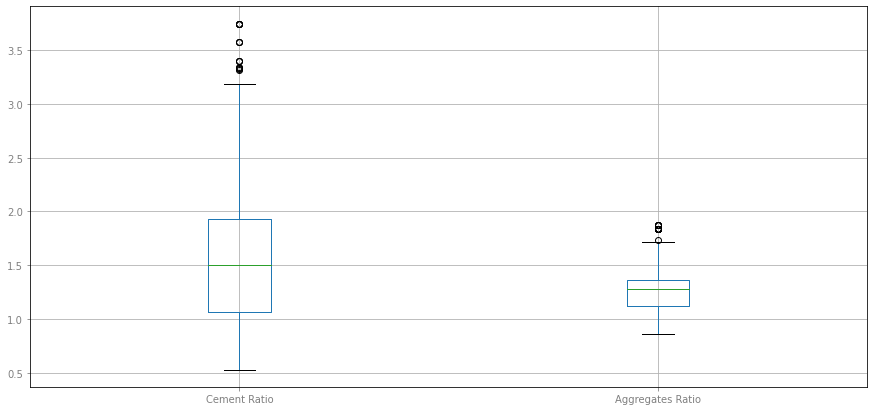

In [16]:
ax = concrete_df[new_attributes].plot.box(figsize=(15, 7), grid=True);
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

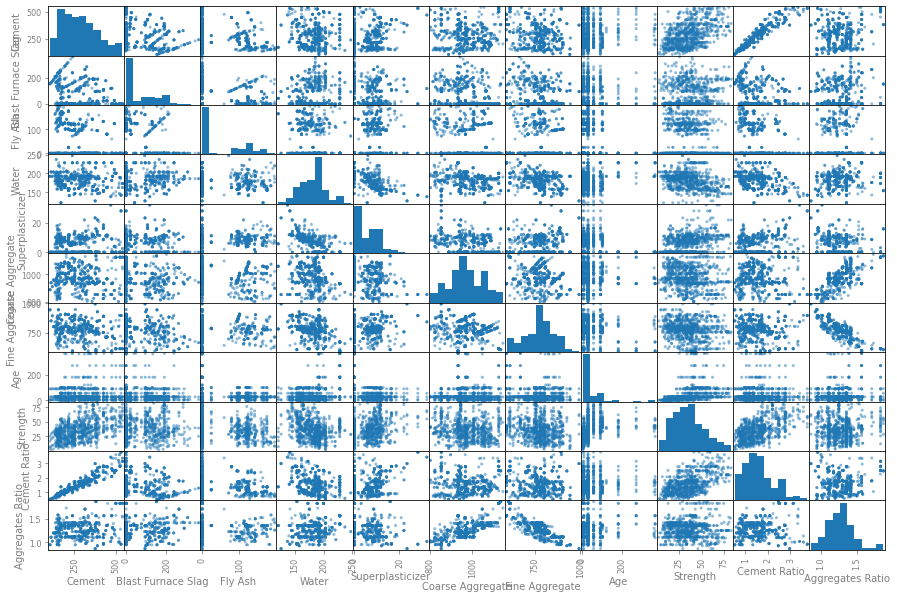

11.91 seconds on executing this code block.


In [23]:
scatter_plot()

The new attributes have a positive correlation, but only **Cement Ratio** had an increase in the absolute value.  Before choosing which attributes to drop is necessary to apply other preprocessing techniques.

# 2. Preprocessing data

## 2.1. Logarithmic transform

A dataset may sometimes contain at least one feature whose values tend to lie near a single number,  also have a non-trivial number of vastly larger or smaller values (skewed continuous attributes).  

Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the concrete strength dataset, some features fit this description:

* **Cement**
* **Blast Furnace Slag** 
* **Fly Ash**
* **Superplasticizer**
* **Age**
* **Cement Ratio**

In the skewed attributes apply a logarithmic transformation,  so the high values and tiny values do not negatively affect the performance of a learning algorithm. This method reduces the effect caused by *outliers*.

To apply the logarithmic transformation correctly, the suggestions given on [ResearchGate portal](https://www.researchgate.net/post/how_to_transform_data_with_negative_values) help to handle the negative values in the skewed attributes, particularly the logarithmic transformation suggested by **Guido Bongi** from the *Italian National research Council*:

$$Transform_{log}(X) = log(X + 1 - min(X))$$

Before applying the transformation, check the linear correlation to the attribute **Strength**, apply the transformation and review the linear correlation changes to decide wich transformed attributes to keep.

In [24]:
attributes_to_transform = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Superplasticizer',
    'Age',
    'Cement Ratio'
]
print(concrete_df[attributes_to_transform].corrwith(concrete_df['Strength']))

Cement                0.496686
Blast Furnace Slag    0.155159
Fly Ash              -0.149749
Superplasticizer      0.353292
Age                   0.332074
Cement Ratio          0.558514
dtype: float64


In [25]:
transformations_df = pd.DataFrame(columns=attributes_to_transform)
min_data = concrete_df[attributes_to_transform].min()

transformations_df = concrete_df[attributes_to_transform].apply(
    lambda x: np.log10(x + 1 - min_data),
    axis=1
)

print(transformations_df.corrwith(concrete_df['Strength']))

Cement                0.454889
Blast Furnace Slag    0.221250
Fly Ash              -0.122872
Superplasticizer      0.324667
Age                   0.555036
Cement Ratio          0.549787
dtype: float64


The linear correlations results showed only the attributes **Blast Furnace Slag** and **Age** got and improvement after the logarithmic transformation, so this transformation is kept only in those attributes.

In [26]:
attributes_to_transform = ['Blast Furnace Slag', 'Age']
min_data = concrete_df[attributes_to_transform].min()

concrete_df[attributes_to_transform] = concrete_df[attributes_to_transform].apply(
    lambda x: np.log10(x + 1 - min_data),
    axis=1
)

print(concrete_df.corrwith(concrete_df['Strength']))

Cement                0.496686
Blast Furnace Slag    0.221250
Fly Ash              -0.149749
Water                -0.284590
Superplasticizer      0.353292
Coarse Aggregate     -0.171612
Fine Aggregate       -0.158425
Age                   0.555036
Strength              1.000000
Cement Ratio          0.558514
Aggregates Ratio      0.040081
dtype: float64


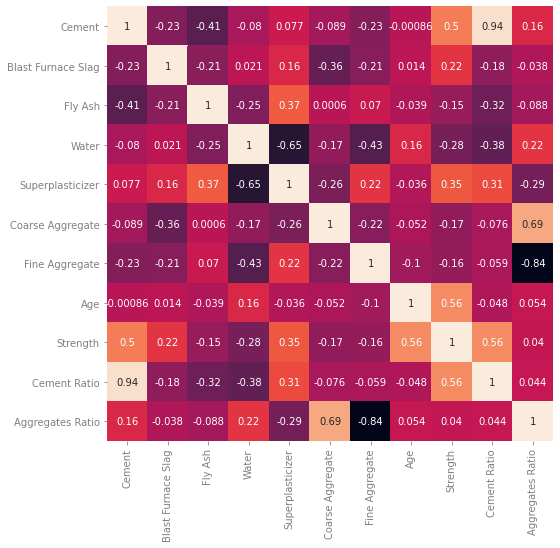

In [27]:
plt.subplots(figsize=(8,8))
ax = sns.heatmap(concrete_df.corr(), annot=True, cbar=False);
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

The created attribute **Cement Ratio** has higher correlation to other attributes than only the **Cement** attribute, and viceversa, the **Cement** attribute has higher correlation to different attributes.

The attribute **Aggregates Ratio** has tiny correlations, also they are smaller than the **Fly Ash** attribute.

## 2.2. Feature Importance

This method is useful to identify attributes that has a tiny contribution in the dataset, those attributes could be dropped.

In [28]:
scaler = skl_pre.StandardScaler()
ada_model = skl_esm.AdaBoostRegressor(random_state=42)

ada_model.fit(
    scaler.fit_transform(concrete_df.drop(columns=['Strength'])),
    concrete_df['Strength']
)

AdaBoostRegressor(random_state=42)

In [29]:
def plot_feature_importances():
    features = concrete_df.drop(columns=['Strength']).columns
    importances = ada_model.feature_importances_
    index = np.argsort(importances)

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    title = plt.title('Feature Importance')
    title.set_color('gray')
    title.set_size(14)
    plt.barh(range(len(index)), importances[index], color='green', align='center')
    plt.yticks(range(len(index)), [features[i] for i in index])
    label_x = plt.xlabel('Relative Importance')
    label_x.set_color('gray')
    label_x.set_size(12)
    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')

    for idx, value in enumerate(index):
        plt.text(
            importances[value] + 0.0025,
            idx,
            f'{importances[value]:.3f}',
            fontsize=12,
            color='gray'
        )

    plt.show(); 

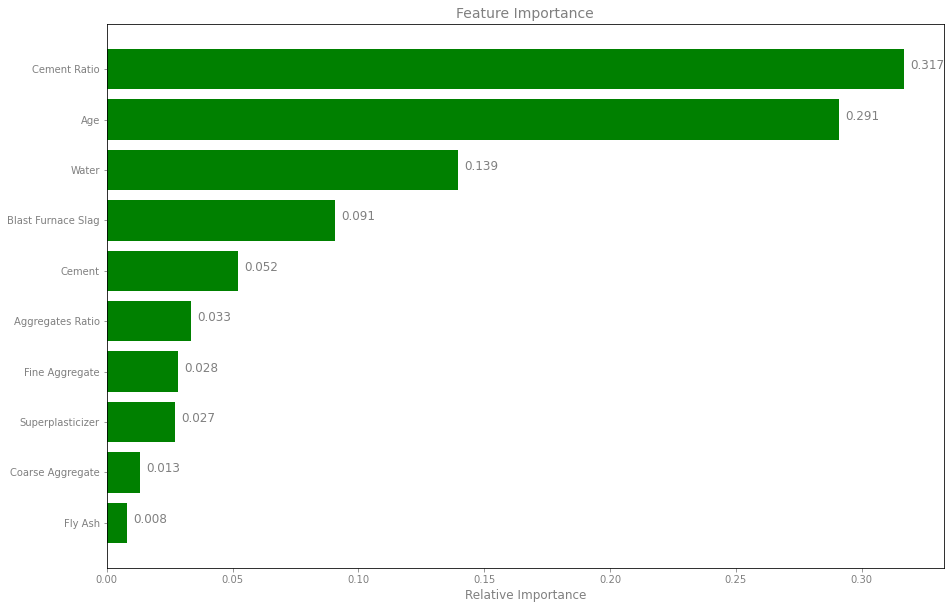

In [30]:
plot_feature_importances()

The results showed the attribute **Aggregates Ratio** has a higher contribution than the **Coarse Aggregates** and **Fine Aggregates** alone. The same case occurs with the **Cement Ratio**, it has a higher contribution, so the base attributes **Cement**, **Coarse Aggregate** and **Fine Aggregate** are dropped.

The attribute **Water** is kept because after the attribute creations their contribution did not drop drastically, so it is possible to have a correlation to other attributes.

In [31]:
concrete_df.drop(
    columns=['Cement', 'Coarse Aggregate', 'Fine Aggregate'],
    inplace=True
)

In [32]:
# Check the new data contribution
scaler = skl_pre.StandardScaler()
ada_model = skl_esm.AdaBoostRegressor(random_state=42)
ada_model.fit(scaler.fit_transform(concrete_df.drop(columns=['Strength'])), concrete_df['Strength'])
features = concrete_df.drop(columns=['Strength']).columns
importances = ada_model.feature_importances_
index = np.argsort(importances)

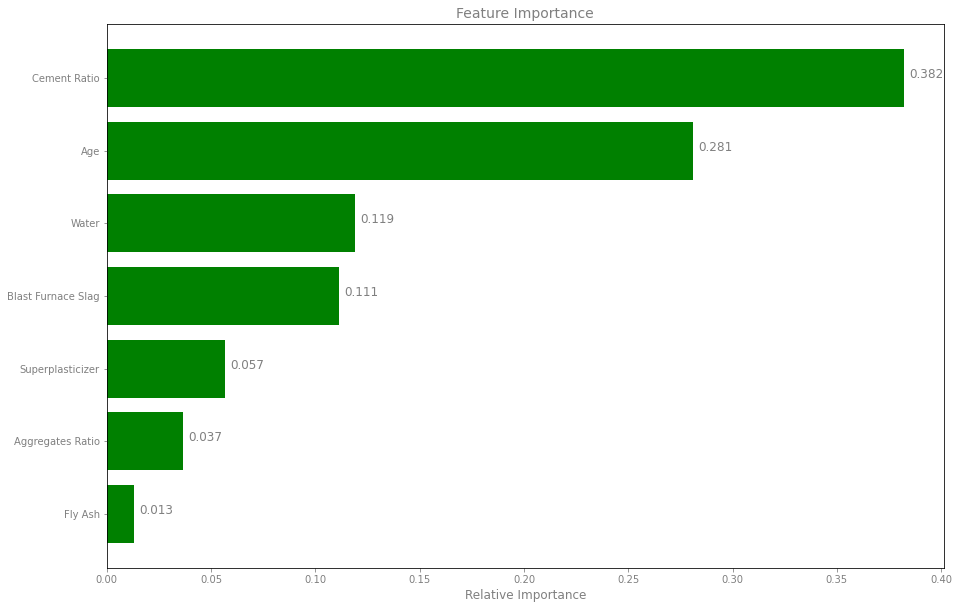

In [33]:
plot_feature_importances()

# 3. Model

Before keep going to the model training and testing, do the preprocessing process to the testing dataset and apply the same standarization (use the same values on the training set).

In [34]:
output_train = concrete_df['Strength'].copy()
output_validation = input_validation['Strength'].copy()
output_test = input_test['Strength'].copy()

In [35]:
# Fit the scaler and scale the input_data
input_train = concrete_df.drop(columns=['Strength']).copy()
scaler_object = skl_pre.StandardScaler()
scaler_object.fit(input_train)
input_train = scaler_object.transform(input_train)

Use the function **preprocess** to get the format of the *input_train* in the *input_validation* and *input_test*.

In [36]:
input_validation = utl.preprocess(
    input_validation.drop(columns=['Strength']),
    min_data,
    scaler_object
)

input_test = utl.preprocess(
    input_test.drop(columns=['Strength']),
    min_data,
    scaler_object
)

## 3.1. Model selection

In [37]:
def train_predict(learner, sample_size, X_train, y_train, X_validation, y_validation):
    results = {}
    start = time.time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time() # Get end time
    
    results['train_time'] = end - start
    
    start = time.time() # Get start time
    predictions_validation = learner.predict(X_validation)
    predictions_train = learner.predict(X_train)
    end = time.time() # Get end time
    
    results['pred_time'] = end - start
    
    results['r2_train'] = skl_mtc.r2_score(y_train, predictions_train)
    results['r2_validation'] = skl_mtc.r2_score(y_validation, predictions_validation)
    results['mse_train'] = skl_mtc.mean_squared_error(y_train, predictions_train)
    results['mse_validation'] = skl_mtc.mean_squared_error(y_validation, predictions_validation)
    
    print(f"{learner.__class__.__name__} trained on {sample_size} samples.")
    
    return results

In [38]:
model_1 = svm.SVR()
model_2 = skl_esm.RandomForestRegressor(random_state=42)
model_3 = xgb.XGBRegressor(random_state=42)

samples_100 = len(input_train)
samples_50 = round(len(input_train)*0.5)
samples_25 = round(len(input_train)*0.25)

results = {}
for model in [model_1, model_2, model_3]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    for index, samples in enumerate([samples_25, samples_50, samples_100]):
        results[model_name][index] = \
        train_predict(model, samples, input_train, output_train, input_validation, output_validation)

SVR trained on 206 samples.
SVR trained on 412 samples.
SVR trained on 824 samples.
RandomForestRegressor trained on 206 samples.
RandomForestRegressor trained on 412 samples.
RandomForestRegressor trained on 824 samples.
XGBRegressor trained on 206 samples.
XGBRegressor trained on 412 samples.
XGBRegressor trained on 824 samples.


In [39]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (15,10))

    # Constants
    bar_width = 0.3
    colors = ['#B70E0B','#159B0B','#0F1EE5']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'r2_train', 'mse_train', 'pred_time', 'r2_validation', 'mse_validation']):
            for i in np.arange(3):
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width=bar_width, color=colors[k])
                ax[j//3, j%3].text(i+k*bar_width-bar_width*0.25, results[learner][i][metric], f'{results[learner][i][metric]:.2f}', fontsize=8)
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["25%", "50%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("R2")
    ax[0, 2].set_ylabel("MSE")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("R2")
    ax[1, 2].set_ylabel("MSE")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("R2 on Training Subset")
    ax[0, 2].set_title("MSE on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("R2 on Validation Set")
    ax[1, 2].set_title("MSE on Validation Set")

    # Create patches for the legend
    patches = []
    for index, learner in enumerate(results.keys()):
        patches.append(mptc.Patch(color=colors[index], label=learner))

    plt.legend(
        handles=patches,
        loc='lower center',
        borderaxespad=-6,
        ncol=3
    )
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16)
    plt.tight_layout()
    plt.show()

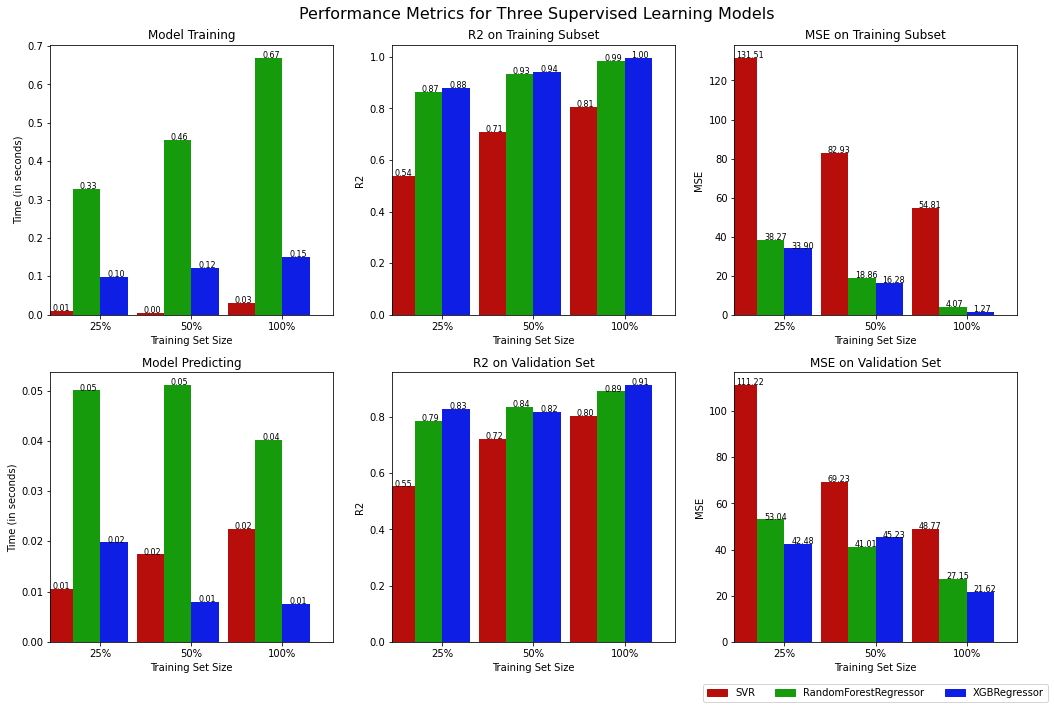

In [40]:
evaluate(results)

## 3.2. Model tunning

In [31]:
train =  np.concatenate((input_train, input_validation))
labels = np.concatenate((output_train, output_validation))

In [32]:
model_3

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
model = xgb.XGBRegressor(
    n_jobs=4,
    random_state=42,
    verbosity=1)

scorer = {
    'R2': skl_mtc.make_scorer(skl_mtc.r2_score),
    'MSE': skl_mtc.make_scorer(skl_mtc.mean_squared_error)
}

parameters = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': [0, 0.001, 0.01, 0.1],
    'min_child_weight': [1, 0.5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'booster': ['gbtree', 'dart'],
    'tree_method': ['exact', 'approx', 'hist']
}

grid_obj = skl_mod_sel.GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring=scorer,
    refit='R2'
)

start_time = time.time()
grid_obj.fit(train, labels)
print(f'{time.time() - start_time:.2f} seconds on executing this code block.')

37317.74 seconds on executing this code block.


In [45]:
print(f'Time execution: {datetime.timedelta(seconds=37317.74)}')

Time execution: 10:21:57.740000


In [46]:
model_3.fit(input_train, output_train)
best_model = grid_obj.best_estimator_
predictions = model_3.predict(input_test)
best_predictions = best_model.predict(input_test)

In [47]:
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=1)

In [48]:
# Report the before-and-afterscores
print("Unoptimized model.\n")
print(f"R2 score on testing data: {skl_mtc.r2_score(output_test, predictions):.4f}")
print(f"MSE on testing data: {skl_mtc.mean_squared_error(output_test, predictions):.4f}")
print("\n\nOptimized Model\n")
print(f"Final R2 score on the testing data: {skl_mtc.r2_score(output_test, best_predictions):.4f}")
print(f"Final MSE on the testing data: {skl_mtc.mean_squared_error(output_test, best_predictions):.4f}")

Unoptimized model.

R2 score on testing data: 0.9299
MSE on testing data: 17.5818


Optimized Model

Final R2 score on the testing data: 0.9554
Final MSE on the testing data: 11.1785


In [49]:
best_model.save_model('xgboost_model.json')

In [50]:
model_test = xgb.XGBRegressor()

In [51]:
model_test.load_model('xgboost_model.json')

In [52]:
predictions_test = model_test.predict(input_test)
print("\n\nOptimized Model\n")
print(f"Final R2 score on the testing data: {skl_mtc.r2_score(output_test, predictions_test):.4f}")
print(f"Final MSE on the testing data: {skl_mtc.mean_squared_error(output_test, predictions_test):.4f}")



Optimized Model

Final R2 score on the testing data: 0.9554
Final MSE on the testing data: 11.1785


In [53]:
model = xgb.XGBRegressor(
    booster='gbtree',
    tree_method='hist',
    n_jobs=4,
    random_state=42,
    verbosity=1)

scorer = {
    'R2': skl_mtc.make_scorer(skl_mtc.r2_score),
    'MSE': skl_mtc.make_scorer(skl_mtc.mean_squared_error)
}

parameters = {
    'n_estimators': [400, 500, 600],
    'max_depth': [3, 4, 5],
    'gamma': [0.0005, 0.001, 0.0015],
    'learning_rate': [0.075, 0.1, 0.15],
    'min_child_weight': [1, 2, 3]
}

grid_obj = skl_mod_sel.GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring=scorer,
    refit='R2'
)

start_time = time.time()
grid_obj.fit(train, labels)
print(f'{time.time() - start_time:.2f} seconds on executing this code block.')

305.62 seconds on executing this code block.


In [54]:
best_model_2 = grid_obj.best_estimator_
best_predictions = best_model_2.predict(input_test)

In [55]:
print("\n\nOptimized Model\n")
print(f"Final R2 score on the testing data: {skl_mtc.r2_score(output_test, best_predictions):.4f}")
print(f"Final MSE on the testing data: {skl_mtc.mean_squared_error(output_test, best_predictions):.4f}")



Optimized Model

Final R2 score on the testing data: 0.9578
Final MSE on the testing data: 10.5862


In [56]:
best_model_2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=1)

In [86]:
model = xgb.XGBRegressor(
    booster='gbtree',
    tree_method='hist',
    learning_rate=0.1,
    gamma=0.001,
    max_depth=4,
    min_child_weight=1,
    n_estimators=700,
    n_jobs=4,
    random_state=42,
    verbosity=1)

scorer = {
    'R2': skl_mtc.make_scorer(skl_mtc.r2_score),
    'MSE': skl_mtc.make_scorer(skl_mtc.mean_squared_error)
}

parameters = {
    'importance_type': ['gain', 'weight', 'cover', 'total_gain', 'total_cover']
}

grid_obj = skl_mod_sel.GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring=scorer,
    refit='R2'
)

start_time = time.time()
grid_obj.fit(train, labels)
print(f'{time.time() - start_time:.2f} seconds on executing this code block.')

8.33 seconds on executing this code block.


In [83]:
best_model_2 = grid_obj.best_estimator_
best_predictions = best_model_2.predict(input_test)

In [84]:
print("\n\nOptimized Model\n")
print(f"Final R2 score on the testing data: {skl_mtc.r2_score(output_test, best_predictions):.4f}")
print(f"Final MSE on the testing data: {skl_mtc.mean_squared_error(output_test, best_predictions):.4f}")



Optimized Model

Final R2 score on the testing data: 0.9592
Final MSE on the testing data: 10.2257


In [85]:
best_model_2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=1)